<!-- @format -->

## Importing Necessary Libraries

This cell imports the required libraries for data manipulation, model training, and evaluation.

- `pandas` is used for data loading and manipulation.
- `train_test_split` from `sklearn.model_selection` is used to split the data into training and testing sets.
- `StandardScaler` from `sklearn.preprocessing` is used for feature scaling.
- `LogisticRegression` from `sklearn.linear_model` is the classification algorithm used.
- `classification_report`, `confusion_matrix`, and `accuracy_score` from `sklearn.metrics` are used for evaluating the model.
- `matplotlib` and `seaborn` are used for graphs.


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

<!-- @format -->

---


<!-- @format -->

## Loading Data and Selecting Columns

This cell loads the training and testing datasets from CSV files using pandas. It then selects specific columns ('is_fraud', 'amt', 'gender', 'job', 'category') to be used for the analysis. This ensures that only relevant features are included in the model.


In [2]:
df = pd.read_csv("data/fraudTrain.csv")
test_df = pd.read_csv("data/fraudTest.csv")

columns_to_keep = [
    "is_fraud",
    "amt",
    "gender",
    "job",
    "category",
]

# Remove all other fields from the DataFrame
df = df[columns_to_keep]
test_df = test_df[columns_to_keep]

<!-- @format -->

---


<!-- @format -->

## Displaying Training Data Information

This cell prints information about the training dataset, including the number of entries, column names, data types, and memory usage. This is useful for quickly understanding the structure and content of the data.


In [3]:
print("\nTraining Data Info:")
print(df.info())


Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 5 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   is_fraud  1296675 non-null  int64  
 1   amt       1296675 non-null  float64
 2   gender    1296675 non-null  object 
 3   job       1296675 non-null  object 
 4   category  1296675 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 49.5+ MB
None


<!-- @format -->

---


<!-- @format -->

## Checking for Missing Values

This cell checks for missing values in the training dataset and prints the sum of missing values for each column. Handling missing values is a crucial step in data preprocessing to avoid errors during model training.


In [4]:
print("\nMissing Values in Training Data:")
print(df.isnull().sum())
print(test_df.isnull().sum())


Missing Values in Training Data:
is_fraud    0
amt         0
gender      0
job         0
category    0
dtype: int64
is_fraud    0
amt         0
gender      0
job         0
category    0
dtype: int64


<!-- @format -->

---


<!-- @format -->

## Filling Missing Values (if any)

This cell fills any missing values in the training dataset with 0. While there were no missing values in this dataset, this is included as a step to handle any potential missing data.


In [5]:
df.fillna(0, inplace=True)
test_df.fillna(0, inplace=True)

<!-- @format -->

---


<!-- @format -->

## Inspecting Data

This cell provides a summary view of the dataset:

- `print("First 5 rows of the training data:")`:
  Displays the first 5 rows of the `df` DataFrame to get a glimpse of the data.
- `print("Data info:")`:
  Prints a concise summary of the DataFrame, including column names, data types, and the number of non-null entries.
- `print("Summary statistics:")`:
  Generates descriptive statistics such as mean, median, min, max, and standard deviation for numerical columns in the DataFrame, offering insights into the data's distribution and scale.


In [6]:
# Display first few rows
print("First 5 rows of the training data:")
print(df.head())

# Display data info
print("\nData info:")
print(df.info())

# Display summary statistics
print("\nSummary statistics:")
print(df.describe())

First 5 rows of the training data:
   is_fraud     amt gender                                job       category
0         0    4.97      F          Psychologist, counselling       misc_net
1         0  107.23      F  Special educational needs teacher    grocery_pos
2         0  220.11      M        Nature conservation officer  entertainment
3         0   45.00      M                    Patent attorney  gas_transport
4         0   41.96      M     Dance movement psychotherapist       misc_pos

Data info:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 5 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   is_fraud  1296675 non-null  int64  
 1   amt       1296675 non-null  float64
 2   gender    1296675 non-null  object 
 3   job       1296675 non-null  object 
 4   category  1296675 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 49.5+ MB
None

Summary statistics:
           is_fraud           amt
count  1.296675e+06  1.296675e+06
mean   5.788652e-03  7.035104e+01
std    7.586269e-02  1.603160e+02
min    0.000000e+00  1.000000e+00
25%    0.000000e+00  9.650000e+00
50%    0.000000e+00  4.752000e+01
75%    0.000000e+00  8.314000e+01
max    1.000000e+00  2.894890e+04


<!-- @format -->

---


<!-- @format -->

## Analyzing the Target Variable

This cell visualizes and quantifies the distribution of the target variable (`is_fraud`), which indicates whether a transaction is fraudulent.


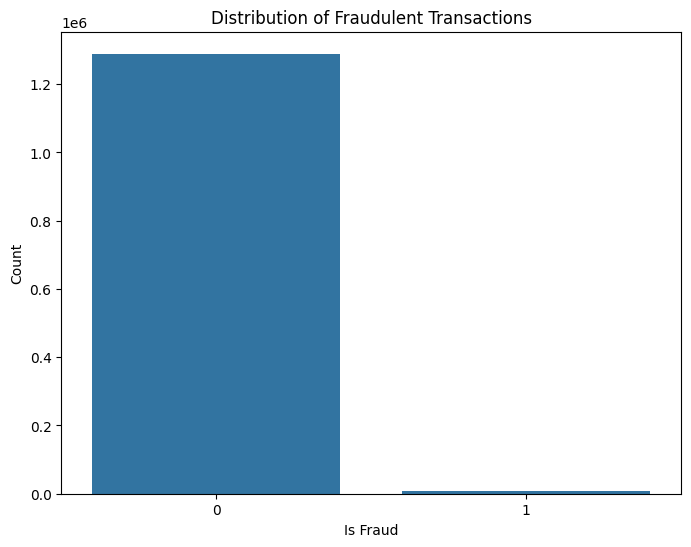


Percentage of Fraudulent and Non-Fraudulent Transactions:
is_fraud
0    99.421135
1     0.578865
Name: proportion, dtype: float64


In [7]:
# Count plot for target variable
plt.figure(figsize=(8, 6))
sns.countplot(x="is_fraud", data=df)
plt.title("Distribution of Fraudulent Transactions")
plt.xlabel("Is Fraud")
plt.ylabel("Count")
plt.show()

# Percentage of fraudulent vs non-fraudulent transactions
fraud_percentage = df["is_fraud"].value_counts(normalize=True) * 100
print("\nPercentage of Fraudulent and Non-Fraudulent Transactions:")
print(fraud_percentage)

<!-- @format -->

---


<!-- @format -->

## Analyzing Categorical Features

This code analyzes the distributions of categorical features (`gender`, `job`, `category`) in the dataset.


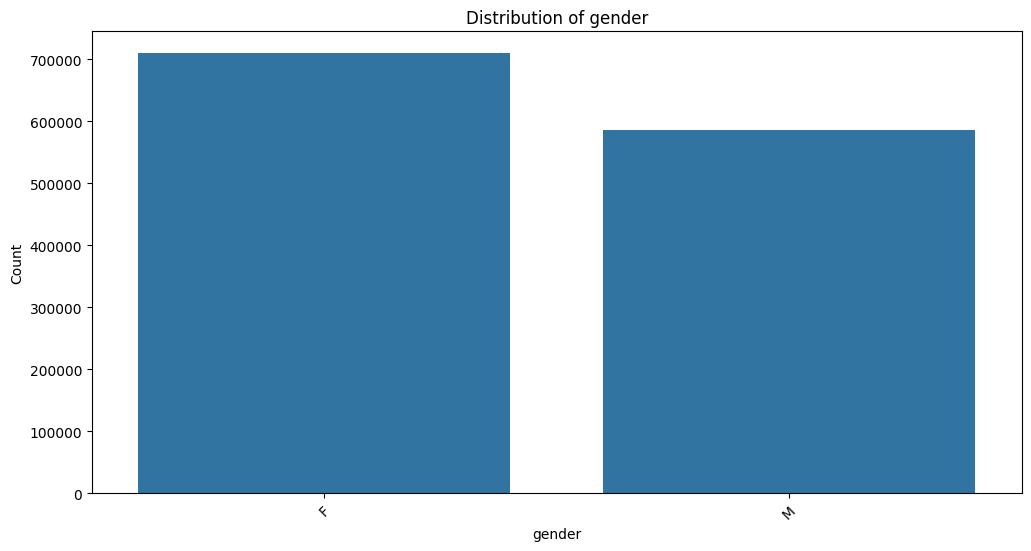


Value counts for gender:
gender
F    709863
M    586812
Name: count, dtype: int64


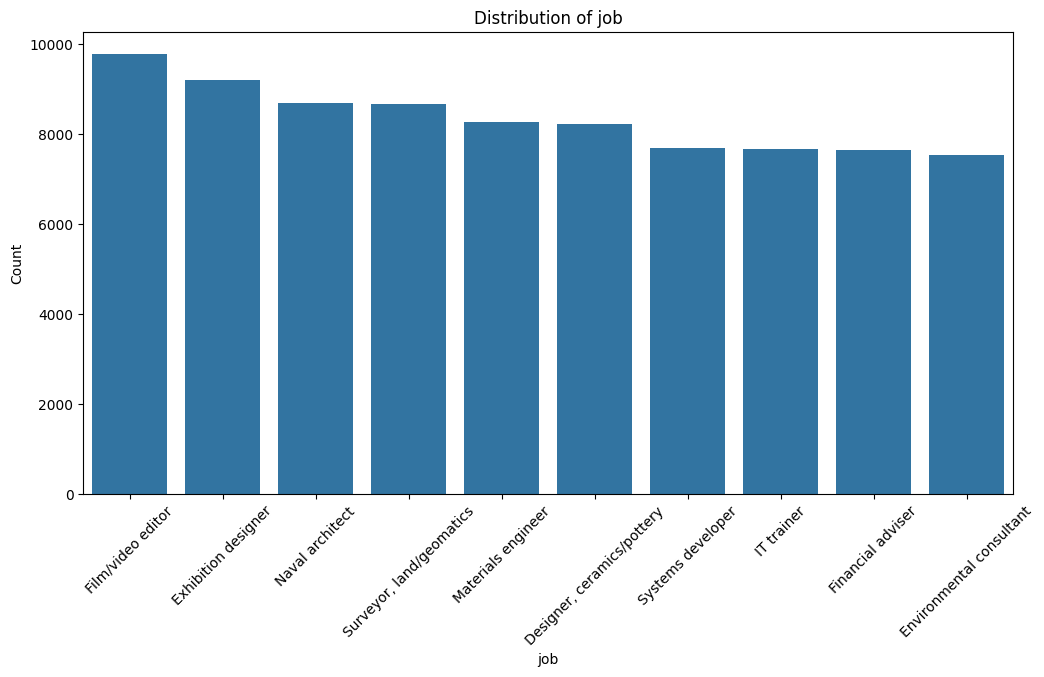


Value counts for job:
job
Film/video editor             9779
Exhibition designer           9199
Naval architect               8684
Surveyor, land/geomatics      8680
Materials engineer            8270
Designer, ceramics/pottery    8225
Systems developer             7700
IT trainer                    7679
Financial adviser             7659
Environmental consultant      7547
Name: count, dtype: int64


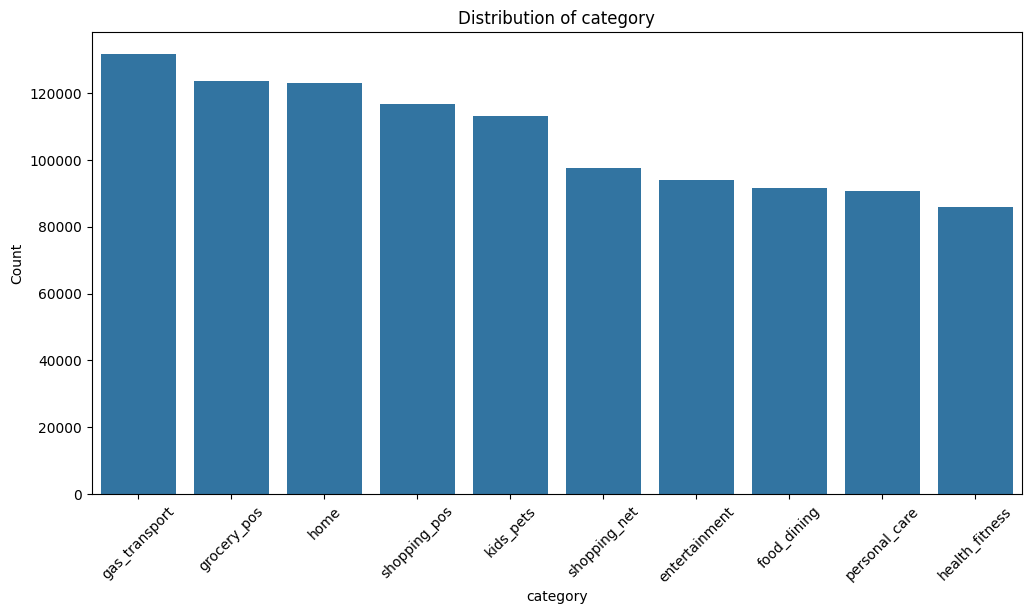


Value counts for category:
category
gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
Name: count, dtype: int64


In [8]:
# Count plots for categorical features
categorical_features = ["gender", "job", "category"]

for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.countplot(
        data=df, x=feature, order=df[feature].value_counts().iloc[:10].index
    )  # Show top 10
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

    # Display value counts for each feature
    print(f"\nValue counts for {feature}:")
    print(df[feature].value_counts().head(10))  # Show top 10

<!-- @format -->

---


<!-- @format -->

## Analyzing Categorical Features vs. Fraud

This code compares the distribution of categorical features (`gender`, `category`) against the target variable (`is_fraud`).


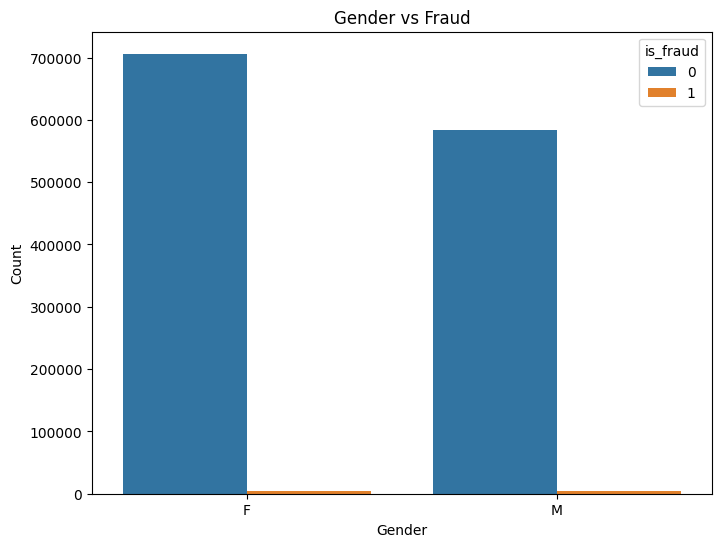

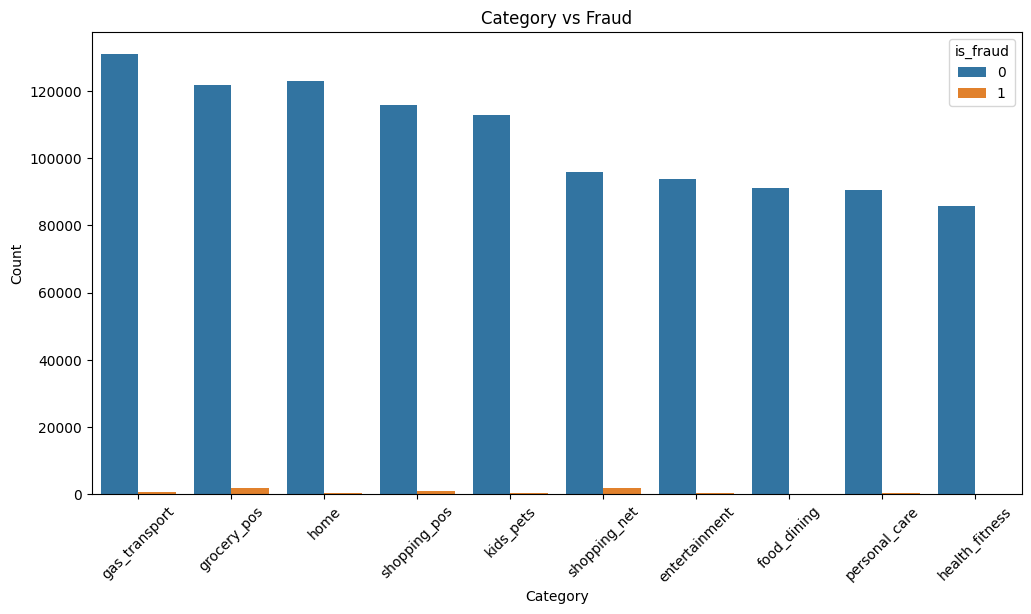

In [9]:
# Gender vs Fraud
plt.figure(figsize=(8, 6))
sns.countplot(x="gender", hue="is_fraud", data=df)
plt.title("Gender vs Fraud")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Category vs Fraud
plt.figure(figsize=(12, 6))
sns.countplot(
    x="category",
    hue="is_fraud",
    data=df,
    order=df["category"].value_counts().iloc[:10].index,
)  # Show top 10
plt.title("Category vs Fraud")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

<!-- @format -->

---


<!-- @format -->

## Defining Features and Target Variable

This cell defines the feature columns (numerical and categorical) and the target column ('is_fraud'). This is important for separating the data into independent variables (features) and the dependent variable (target).


In [10]:
numerical_features = ["amt"]
categorical_features = ["gender", "job", "category"]
target_column = "is_fraud"

<!-- @format -->

---


<!-- @format -->

## One-Hot Encoding Categorical Features

This cell converts categorical features into numerical data using one-hot encoding. This is necessary because most machine learning algorithms require numerical input. `drop_first=True` is used to avoid multicollinearity.


In [11]:
data = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Separate features and target variable
X = data.drop(target_column, axis=1)
y = data[target_column]

<!-- @format -->

---


<!-- @format -->

## Splitting Data into Training and Testing Sets

This cell splits the data into training and testing sets using `train_test_split`. The training set is used to train the model, and the testing set is used to evaluate its performance. `test_size=0.3` means 30% of the data will be used for testing, and `random_state=42` ensures reproducibility.


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

<!-- @format -->

---


<!-- @format -->

## Scaling Numerical Features

This cell scales the numerical features using `StandardScaler`. Scaling is important to ensure that all features have a similar range of values, which can improve the performance of the model.


In [13]:
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

<!-- @format -->

---


<!-- @format -->

## Training the Logistic Regression Model

This cell initializes and trains a Logistic Regression model using the training data. `max_iter=1000` sets the maximum number of iterations for the solver to converge.


In [14]:
model = LogisticRegression(max_iter=1000)

# Train the model on the training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

<!-- @format -->

---


<!-- @format -->

## Evaluating the Model

This cell evaluates the trained model using the test data. It calculates the accuracy score, displays the and prints the classification report. These metrics provide insights into the model's performance, including precision, recall, and F1-score.


In [15]:
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.99


<!-- @format -->

---


<!-- @format -->

## Defining Test Cases

This cell defines test cases for transactions. These test cases include the transaction amount, gender, job, and category.


In [16]:
test_cases_non_fraudulent = pd.DataFrame(
    {
        "amt": [2.86],
        "gender": ["M"],
        "job": ["Mechanical engineer"],
        "category": ["personal_care"],
    }
)

test_cases_fraudulent = pd.DataFrame(
    {
        "amt": [100],
        "gender": ["F"],
        "job": ["Software Engineer"],
        "category": ["Groceries"],
    }
)

<!-- @format -->

---


<!-- @format -->

## Defining Test Model Function

This cell defines function `test_model` which takes in model and test_case as parameter. This function does pre processing and predicts on the model.


In [17]:
def test_model(model, test_case, X_train_columns):  # Pass X_train.columns as argument

    test_df = pd.DataFrame(test_case)

    # One-hot encode categorical features
    test_df = pd.get_dummies(
        test_df, columns=["gender", "job", "category"], drop_first=True
    )

    # Identify missing columns
    missing_cols = set(X_train_columns) - set(test_df.columns)

    # Create a dictionary to hold the missing columns with zero values
    missing_data = {}
    for col in missing_cols:
        missing_data[col] = [0] * len(
            test_df
        )  # Create list of 0s with length of test_df

    # Create a DataFrame from the missing columns data
    missing_df = pd.DataFrame(missing_data)

    # Concatenate the missing columns DataFrame with the original test_df
    test_df = pd.concat([test_df, missing_df], axis=1)

    # Reorder columns to match training set
    test_df = test_df[X_train_columns]

    # Make predictions using the trained model
    predictions = model.predict(test_df)

    # Add predictions to the original DataFrame (optional, if you need it later)
    test_df["predicted_is_fraud"] = predictions

    return predictions

<!-- @format -->

---


<!-- @format -->

## Calling test model

This cell calls the `test_model` with model and test_cases_fraudulent and prints the result.


In [18]:
# Call the function to make predictions
result_df = test_model(model, test_cases_fraudulent, X_train.columns)
result_df

array([1])

In [19]:
# Call the function to make predictions
result_df = test_model(model, test_cases_non_fraudulent, X_train.columns)
result_df

array([0])